RK45, 1 variable

Theoretical solution: 9.542876790796473


Classic RK4: 
No. of steps: 52
Estimated value: 10.140566385219437


RK45: 
No. of steps: 48
Estimated value: 10.21499477469368


Modified RK45: 
No. of steps: 68
Estimated value: 9.542738027559297




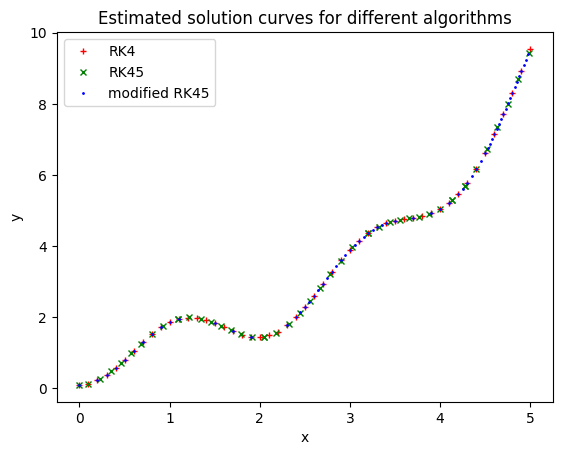

Text(0.5, 1.0, 'Actual solution curve')

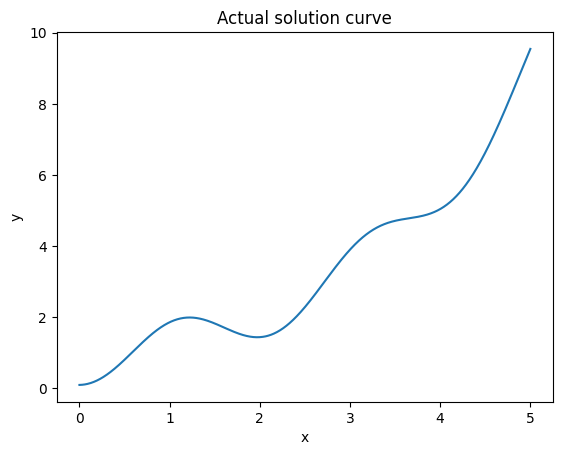

In [12]:
import matplotlib.pyplot as plt # Library file to plot functions
import mylibrary.plotfunc as fplot
import math
def f(x,y):
    return (y/2 + 2*math.sin(3*x))

def ff(x): # Actual Solution function
    return (-24*math.cos(3*x) - 4*math.sin(3*x) + ((37*0.1)+24)*math.exp(x/2) )/37

def rk4(x0,y0,xn,h): # Normal RK4 code just for comparison
    X=[]
    Y=[]
    ct=1
    while x0 < xn :
        X.append(x0)
        Y.append(y0)
        k1 = h*f(x0,y0)
        k2 = h*f(x0+h/2,y0+k1/2)
        k3 = h*f(x0+h/2,y0+k2/2)
        k4 = h*f(x0+h,y0+k3)
        y0+= (k1 + 2*k2 + 2*k3 + k4)/6
        x0+= h
        ct+=1
    print("Classic RK4: \nNo. of steps:",ct)
    print("Estimated value:",y0)
    print("\n")
    return X,Y

def rk45(x0,y0,xn,h): # RK45 main code
    epsilon = 0.000001
    i = 0
    X=[]
    Y=[]
    ct=1
    while x0 < xn :
        X.append(x0)
        Y.append(y0)
        k1 = h*f(x0,y0)
        k2 = h*f(x0+h/4, y0+k1/4)
        k3 = h*f(x0+3*h/8, y0+3*k1/32+9*k2/32)
        k4 = h*f(x0+12*h/13, y0+1932*k1/2197-7200*k2/2197+7296*k3/2197)
        k5 = h*f(x0+h, y0+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
        k6 = h*f(x0+h/2, y0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
        w1 = y0 + 25*k1/216+1408*k3/2565+2197*k4/4104-k5/5
        w2 = y0 + 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
        R = abs(w1-w2)/h
        delta = 0.84*(epsilon/R)**(1/4)
        if R<=epsilon:
            x0 = x0+h
            y0 = w1
            i = i+1
            h = delta*h
        else:
            h = delta*h
        ct+=1
    print("RK45: \nNo. of steps:",ct)
    print("Estimated value:",y0)
    print("\n")
    return X,Y

def mrk45sub(x0,y0,h,w): # modified RK45 all increment calculations
    h=h*w
    k1 = h*f(x0,y0)
    k2 = h*f(x0+h/4, y0+k1/4)
    k3 = h*f(x0+3*h/8, y0+3*k1/32+9*k2/32)
    k4 = h*f(x0+12*h/13, y0+1932*k1/2197-7200*k2/2197+7296*k3/2197)
    k5 = h*f(x0+h,y0+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
    k6 = h*f(x0+h/2, y0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
    kc = 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
    return kc

def mrk45(x0,y0,xn,h,m,min,max): # modified RK45 main code
    X=[]
    Y=[]
    ct=1
    y1=float((xn-x0)/100)
    while x0 < xn :
        X.append(x0)
        Y.append(y0)
        if abs(mrk45sub(x0,y0,h,1)/y1) > max:
            w=1
            while abs(mrk45sub(x0,y0,h,w)/y1) > max:
                w=w/m
            h=h*w
        elif abs(mrk45sub(x0,y0,h,1)/y1) < min:
            w=1
            while abs(mrk45sub(x0,y0,h,w)/y1) < min:
                w=m*w
            h=h*w
        kc = mrk45sub(x0,y0,h,1)
        y0+= kc
        x0+= h
        ct+=1
    print("Modified RK45: \nNo. of steps:",ct)
    print("Estimated value:",y0)
    print("\n")
    return X,Y

#Initial values and boundary conditions
x0=0.0
y0=0.1
xn=5
h=0.1
print("Theoretical solution:",ff(xn))
print("\n")
X,Y=rk4(x0,y0,xn,h)
plt.plot(X,Y,'+',color='red',markersize=5.0,label="RK4")
X1,Y1=rk45(x0,y0,xn,h)
plt.plot(X1,Y1,'x',color='green',markersize=5.0,label="RK45")
m=2
min=1.0
max=5.0
X2,Y2=mrk45(x0,y0,xn,h,m,min,max)
plt.plot(X2,Y2,'.',color='blue',markersize=2.0,label="modified RK45")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Estimated solution curves for different algorithms")
plt.show()
fplot.main(ff,x0,xn)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Actual solution curve")


RK45 2 variables code

Theoretical solution: 10.000000000000503


Classic RK4: 
No. of steps: 1002
Estimated value: 10.00000000000046


RK45: 
No. of steps: 845
Estimated value: 9.999999993011


Modified RK45: 
No. of steps: 80645
Estimated value: 10.0000759381297




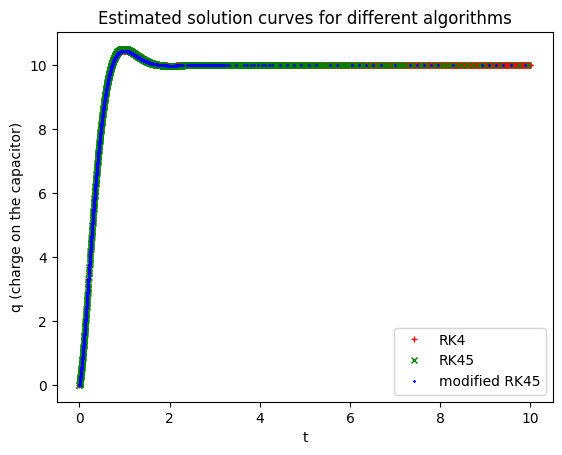

Text(0.5, 1.0, 'Actual solution curve')

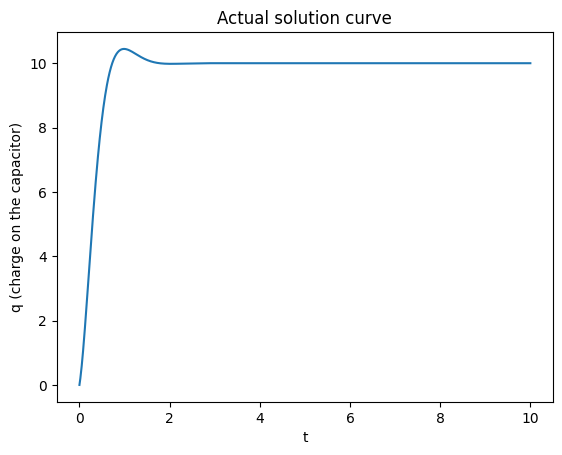

In [11]:
import matplotlib.pyplot as plt # Library file to plot functions
import mylibrary.plotfunc as fplot
import math
def f1(t,x,y):
    return (y)

def f2(t,x,y):
    return (180 - 6*y - 18*x)

def ff(t): # Actual Solution function
    return (-10*math.exp(-3*t)*math.cos(3*t) - 7*math.exp(-3*t)*math.sin(3*t)+10)

def rk4(x0,y0,t,tn,h): # Normal RK4 code just for comparison
    X=[]
    Y=[]
    T=[]
    ct=1
    while t < tn :
        X.append(x0)
        Y.append(y0)
        T.append(t)
        k1x=h*f1(t,x0,y0)
        k1y=h*f2(t,x0,y0)
        k2x=h*f1(t+h/2,x0+k1x/2,y0+k1y/2)
        k2y=h*f2(t+h/2,x0+k1x/2,y0+k1y/2)
        k3x=h*f1(t+h/2,x0+k2x/2,y0+k2y/2)
        k3y=h*f2(t+h/2,x0+k2x/2,y0+k2y/2)
        k4x=h*f1(t+h,x0+k3x,y0+k3y)
        k4y=h*f2(t+h,x0+k3x,y0+k3y)
        x0+= (k1x + 2*k2x + 2*k3x + k4x)/6
        y0+= (k1y + 2*k2y + 2*k3y + k4y)/6
        t+=h
        ct+=1
    print("Classic RK4: \nNo. of steps:",ct)
    print("Estimated value:",x0)
    print("\n")
    return T,X

def rk45(x0,y0,t0,tn,h): # RK45 main code
    epsilon = 0.000001
    i = 0
    X=[]
    Y=[]
    T=[]
    ct=1
    while t0 < tn :
        X.append(x0)
        Y.append(y0)
        T.append(t0)
        k1 = h*f2(t0,x0,y0)
        k2 = h*f2(t0+h/4,x0+k1/4, y0+k1/4)
        k3 = h*f2(t0+3*h/8, x0+3*k1/32+9*k2/32,y0+3*k1/32+9*k2/32)
        k4 = h*f2(t0+12*h/13, x0+1932*k1/2197-7200*k2/2197+7296*k3/2197,y0+1932*k1/2197-7200*k2/2197+7296*k3/2197)
        k5 = h*f2(t0+h, x0+439*k1/216-8*k2+3680*k3/513-845*k4/4104,y0+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
        k6 = h*f2(t0+h/2, x0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40,y0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
        w1 = y0 + 25*k1/216+1408*k3/2565+2197*k4/4104-k5/5
        w2 = y0 + 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
        kx1 = h*f1(t0,x0,y0)
        kx2 = h*f1(t0+h/4,x0+kx1/4, y0+kx1/4)
        kx3 = h*f1(t0+3*h/8, x0+3*kx1/32+9*kx2/32,y0+3*kx1/32+9*kx2/32)
        kx4 = h*f1(t0+12*h/13, x0+1932*kx1/2197-7200*kx2/2197+7296*kx3/2197,y0+1932*kx1/2197-7200*kx2/2197+7296*kx3/2197)
        kx5 = h*f1(t0+h, x0+439*kx1/216-8*kx2+3680*kx3/513-845*kx4/4104,y0+439*kx1/216-8*kx2+3680*kx3/513-845*kx4/4104)
        kx6 = h*f1(t0+h/2, x0-8*kx1/27+2*kx2-3544*kx3/2565+1859*kx4/4104-11*kx5/40,y0-8*kx1/27+2*kx2-3544*kx3/2565+1859*kx4/4104-11*kx5/40)
        wx1 = x0 + 25*kx1/216+1408*kx3/2565+2197*kx4/4104-kx5/5
        wx2 = x0 + 16*kx1/135+6656*kx3/12825+28561*kx4/56430-9*kx5/50+2*kx6/55

        R = abs(w1-w2)/h
        delta = 0.84*(epsilon/R)**(1/4)
        if R<=epsilon:
            t0 = t0+h
            y0 = w1
            x0 = wx1
            i = i+1
            h = delta*h
        else:
            h = delta*h
        ct+=1
    print("RK45: \nNo. of steps:",ct)
    print("Estimated value:",x0)
    print("\n")
    return T,X


def mrk45sub1(x0,y0,t0,h,w): # modified RK45 all increment calculations
    h=h*w
    k1 = h*f1(t0,x0,y0)
    k2 = h*f1(t0+h/4,x0+k1/4, y0+k1/4)
    k3 = h*f1(t0+3*h/8, x0+3*k1/32+9*k2/32,y0+3*k1/32+9*k2/32)
    k4 = h*f1(t0+12*h/13, x0+1932*k1/2197-7200*k2/2197+7296*k3/2197,y0+1932*k1/2197-7200*k2/2197+7296*k3/2197)
    k5 = h*f1(t0+h, x0+439*k1/216-8*k2+3680*k3/513-845*k4/4104,y0+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
    k6 = h*f1(t0+h/2, x0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40,y0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
    kc = 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
    return kc

def mrk45sub2(x0,y0,t0,h,w): # modified RK45 all increment calculations
    h=h*w
    k1 = h*f2(t0,x0,y0)
    k2 = h*f2(t0+h/4,x0+k1/4, y0+k1/4)
    k3 = h*f2(t0+3*h/8, x0+3*k1/32+9*k2/32,y0+3*k1/32+9*k2/32)
    k4 = h*f2(t0+12*h/13, x0+1932*k1/2197-7200*k2/2197+7296*k3/2197,y0+1932*k1/2197-7200*k2/2197+7296*k3/2197)
    k5 = h*f2(t0+h, x0+439*k1/216-8*k2+3680*k3/513-845*k4/4104,y0+439*k1/216-8*k2+3680*k3/513-845*k4/4104)
    k6 = h*f2(t0+h/2, x0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40,y0-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40)
    kc = 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
    return kc

def mrk45(x0,y0,t0,tn,h,m,min,max): # modified RK45 main code
    X=[]
    Y=[]
    T=[]
    ct=1
    y1=float((tn-t0)/100)
    while t0 < tn :
        X.append(x0)
        Y.append(y0)
        T.append(t0)
        if abs(mrk45sub2(x0,y0,t0,h,1)/y1) > max:
            w=1
            while abs(mrk45sub2(x0,y0,t0,h,w)/y1) > max:
                w=w/m
            h=h*w
        elif abs(mrk45sub2(x0,y0,t0,h,1)/y1) < min:
            w=1
            while abs(mrk45sub2(x0,y0,t0,h,w)/y1) < min:
                w=m*w
            h=h*w
        kc1 = mrk45sub1(x0,y0,t0,h,1)
        kc2 = mrk45sub2(x0,y0,t0,h,1)
        x0+= kc1
        y0+= kc2
        t0+= h
        ct+=1
    print("Modified RK45: \nNo. of steps:",ct)
    print("Estimated value:",x0)
    print("\n")
    return T,X

#Initial values and boundary conditions
x0=0.0
y0=9.0
t0=0.0
tn=10
h=0.01
print("Theoretical solution:",ff(tn))
print("\n")
X,Y=rk4(x0,y0,t0,tn,h)
plt.plot(X,Y,'+',color='red',markersize=5.0,label="RK4")
X1,Y1=rk45(x0,y0,t0,tn,h)
plt.plot(X1,Y1,'x',color='green',markersize=5.0,label="RK45")
m=2
min=0.001
max=0.01
X2,Y2=mrk45(x0,y0,t0,tn,h,m,min,max)
plt.plot(X2,Y2,'.',color='blue',markersize=2.0,label="modified RK45")
plt.xlabel("t")
plt.ylabel("q (charge on the capacitor)")
plt.legend()
plt.title("Estimated solution curves for different algorithms")
plt.show()
fplot.main(ff,t0,tn)
plt.xlabel("t")
plt.ylabel("q (charge on the capacitor)")
plt.title("Actual solution curve")
